In [1]:
import os
import sys

In [7]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG
from maquinas.recursivelyenumerable.tspda import TwoStackPushDownAutomaton as PDA2

No terminal : S, A, D, B
Terminals   : b, a
Start       : S
Productions :
 S → aSA | BSB | D
 A → a
 B → b
 D → ε


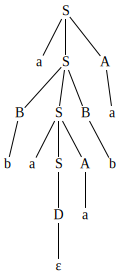

In [3]:
long=CFG('S->aSA; S->BSB; S->D; A-> a; B->b; D-> epsilon')
print(long.summary())
roots,chart,forest=long.parse('abaaba')
long.graph_trees(long.extract_trees(forest))

In [4]:
long.save_trees_img(long.extract_trees(forest),'original')

No terminal : T, S, A, N, B, V, C, R
Terminals   : b, a
Start       : R
Productions :
 R → S
 S → NT | BV | NA | BB
 T → SA
 V → SB
 N → a
 A → a
 C → a
 B → b


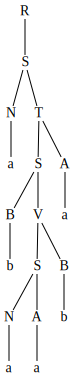

In [5]:
fnc=CFG('R->S; S-> NT; S-> BV; S-> NA; S-> BB; T-> SA; V -> SB; N-> a; A -> a; C -> a; B -> b')
print(fnc.summary())
roots,chart,forest=fnc.parse('abaaba')
fnc.graph_trees(fnc.extract_trees(forest))

In [6]:
fnc.save_trees_img(fnc.extract_trees(forest),'fnc')

In [8]:
# Creating automata finito
aⁿbⁿcⁿ=PDA2(Q=['q_0','q_1','q_2','q_3'],
         sigma=['a','b'],
         gamma=['A'],
         q_0='q_0',
         A=['q_3'],
         delta=[
            (('q_0','a','Z0','Z0'),[('q_0','AZ0','AZ0')]),
            (('q_0','a','A','A'),[('q_0','AA','AA')]),
            (('q_0','b','A','A'),[('q_1','epsilon','A')]),
            (('q_1','b','A','A'),[('q_1','epsilon','A')]),
            (('q_1','c','Z0','A'),[('q_2','Z0','epsilon')]),
            (('q_2','c','Z0','A'),[('q_2','Z0','epsilon')]),
            (('q_2','epsilon','Z0','Z0'),[('q_3','Z0','Z0')]),
         ]
    )

In [9]:
aⁿbⁿcⁿ.save_img("anbncn")

In [11]:
aⁿbⁿcⁿ.save_gif('aaabbbccc',"anbncn.gif")